In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import skimage

import utils
import forward_model
import globals
import least_squares
import section_search
import coordinate_descent
import initialization

import torch

/data/holly_jackson/miniconda3/envs/dfd-sparse/lib/python3.12/site-packages/gco/__init__.py:7: FutureWarning: In the future `np.bool` will be defined as the corresponding NumPy scalar.
  if not hasattr(numpy, name):


In [2]:
globals.init_MobileDepth()

IMAGE_RANGE = 255.
globals.window_size = 50
rad = globals.window_size // 2
# globals.thresh = 0.01
# globals.ps = 1


In [25]:
experiment_folder = '/data/holly_jackson/experiments/mobile-depth-windowed50-thresh0.1-telephone_2025-11-16_21-53-46'
example_name =  os.path.basename(experiment_folder).split("_")[0].split("thresh0.1-")[1]
print(example_name)

bottles


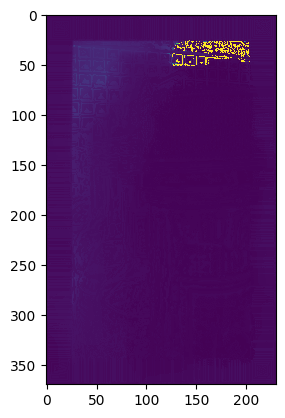

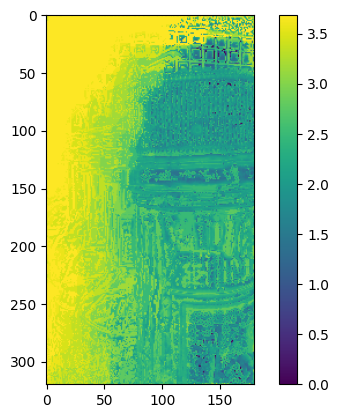

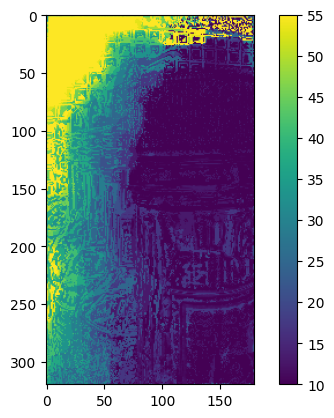

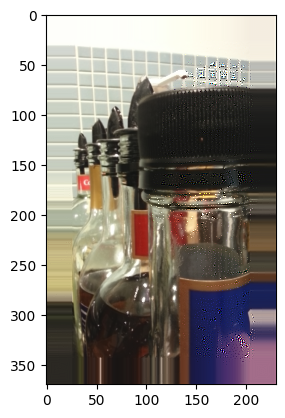

In [26]:
dpt = utils.load_dpt_npy(experiment_folder, 'dpt')
aif = utils.load_aif(experiment_folder, 'aif')

plt.imshow(dpt)
plt.show()

dpt_cropped = dpt[rad:-rad, rad:-rad]
norm_dpt = (dpt_cropped - np.min(dpt_cropped)) / (np.max(dpt_cropped) - np.min(dpt_cropped))

depth_shifted = dpt_cropped - dpt_cropped.min() + 1e-6
log_d = np.log(depth_shifted)
# log_norm_dpt = (log_d - log_d.min()) / (log_d.max() - log_d.min() + 1e-6)

min_range = 10#0.15
max_range = 55#0.6
plt.imshow(log_d, vmin=0, vmax = np.log(40))
plt.colorbar()
plt.show()

plt.imshow(dpt_cropped, vmin=min_range, vmax = max_range)
plt.colorbar()
plt.show()

# plt.imshow(log_norm_dpt)
# plt.colorbar()
# plt.show()

plt.imshow(aif / IMAGE_RANGE)
plt.show()

# plt.imsave(
#     "figures/mobiledepth/MobileDepth_"+example_name+"_DPT_NORM.png",
#     norm_dpt,
#     cmap="viridis",
#     origin="upper",
# )

# plt.imsave(
#     "figures/mobiledepth/MobileDepth_"+example_name+"_DPT_LOG_NORM.png",
#     log_norm_dpt,
#     cmap="viridis",
#     origin="upper",
# )

plt.imsave(
    "figures/mobiledepth/MobileDepth_"+example_name+"_DPT_croppedrange_v2.png",
    dpt_cropped,
    cmap="viridis",
    vmin=min_range, vmax=max_range,
    origin="upper",
)

plt.imsave(
    "figures/mobiledepth/MobileDepth_"+example_name+"_AIF_v2.png",
    aif[rad:-rad, rad:-rad] / IMAGE_RANGE,
    origin="upper",
)



In [ ]:
tv_thresh = 2.5
dpt_new, _ = section_search.remove_outliers(dpt.copy(), aif, patch_type = 'tv',
                                            tv_thresh = tv_thresh, to_plot=True)
plt.imshow(dpt_new)
plt.show()

dpt_new_cropped = dpt_new[rad:-rad, rad:-rad]
# norm_dpt = (dpt_new_cropped - np.min(dpt_new_cropped)) / (np.max(dpt_new_cropped) - np.min(dpt_new_cropped))


min_range = 0#0.175
max_range = 0.6

plt.imshow(norm_dpt, vmin=min_range, vmax=max_range)
plt.show()

plt.imsave(
    "figures/MobileDepth_"+example_name+"_DPT_NORM_outlier_removal_thresh"+str(tv_thresh)+"_cropped_range.png",
    dpt_new_cropped,
    cmap="viridis",
    vmin=min_range, vmax=max_range,
    origin="upper",
)